In [ ]:
import pandas as pd

dataframe1 = pd.read_csv("/content/seeds_dataset.txt", sep='\s+', header=None)

dataframe1.to_csv('seeds.csv',
				index = None)


In [ ]:
import numpy as np
from numpy import genfromtxt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/seeds.csv")

In [ ]:
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.isnull().sum()


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [ ]:
df.columns =["Area","Perimeter","Compactness","Length of kernel","Width of kernel","Asymmetry coefficient","Length of kernel groove","Class (1, 2, 3)"]

In [ ]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1, 2, 3)            0
dtype: int64

In [ ]:
df.corr()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Length of kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Width of kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Length of kernel groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
"Class (1, 2, 3)",-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


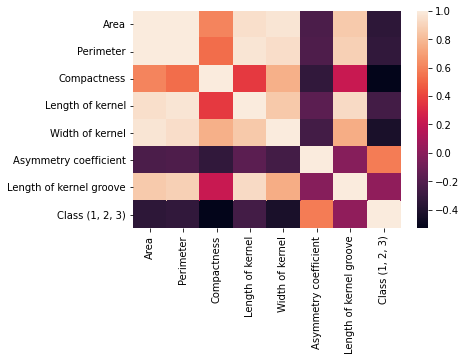

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


**SPLITTING**

In [ ]:
X=df.drop('Class (1, 2, 3)',axis=1)
y=df['Class (1, 2, 3)']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((147, 7), (63, 7))

Build the machine learning models using SVM, Decision tree and Random Forest 
algorithms (3x5=15 marks)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import tree
dc = tree.DecisionTreeClassifier()
dc.fit(X_train,y_train)
decision_cls = dc.predict(X_test)
decision_cls

array([1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1,
       3, 2, 2, 1, 1, 2, 1, 3, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 2])

DECISION TREE
[[17  0  3]
 [ 2 19  0]
 [ 4  0 18]]


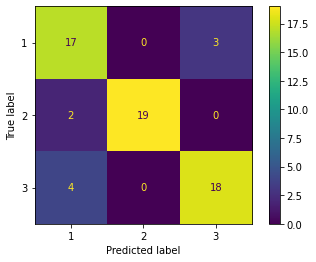

In [ ]:
print("DECISION TREE")
print(confusion_matrix(y_test, decision_cls))
cm = confusion_matrix(y_test, decision_cls)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dc.classes_)
disp.plot()
plt.show()

[Text(0.6710526315789473, 0.9166666666666666, 'Length of kernel groove <= 5.594\ngini = 0.667\nsamples = 147\nvalue = [50, 49, 48]\nclass = 1'),
 Text(0.4473684210526316, 0.75, 'Area <= 13.115\ngini = 0.51\nsamples = 98\nvalue = [49, 1, 48]\nclass = 1'),
 Text(0.2631578947368421, 0.5833333333333334, 'Length of kernel groove <= 4.869\ngini = 0.226\nsamples = 54\nvalue = [7, 0, 47]\nclass = 3'),
 Text(0.15789473684210525, 0.4166666666666667, 'Length of kernel <= 5.043\ngini = 0.444\nsamples = 9\nvalue = [6, 0, 3]\nclass = 1'),
 Text(0.10526315789473684, 0.25, 'Asymmetry coefficient <= 2.285\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3]\nclass = 3'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = 3'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = 1'),
 Text(0.3684210526315789, 0.4166666666666

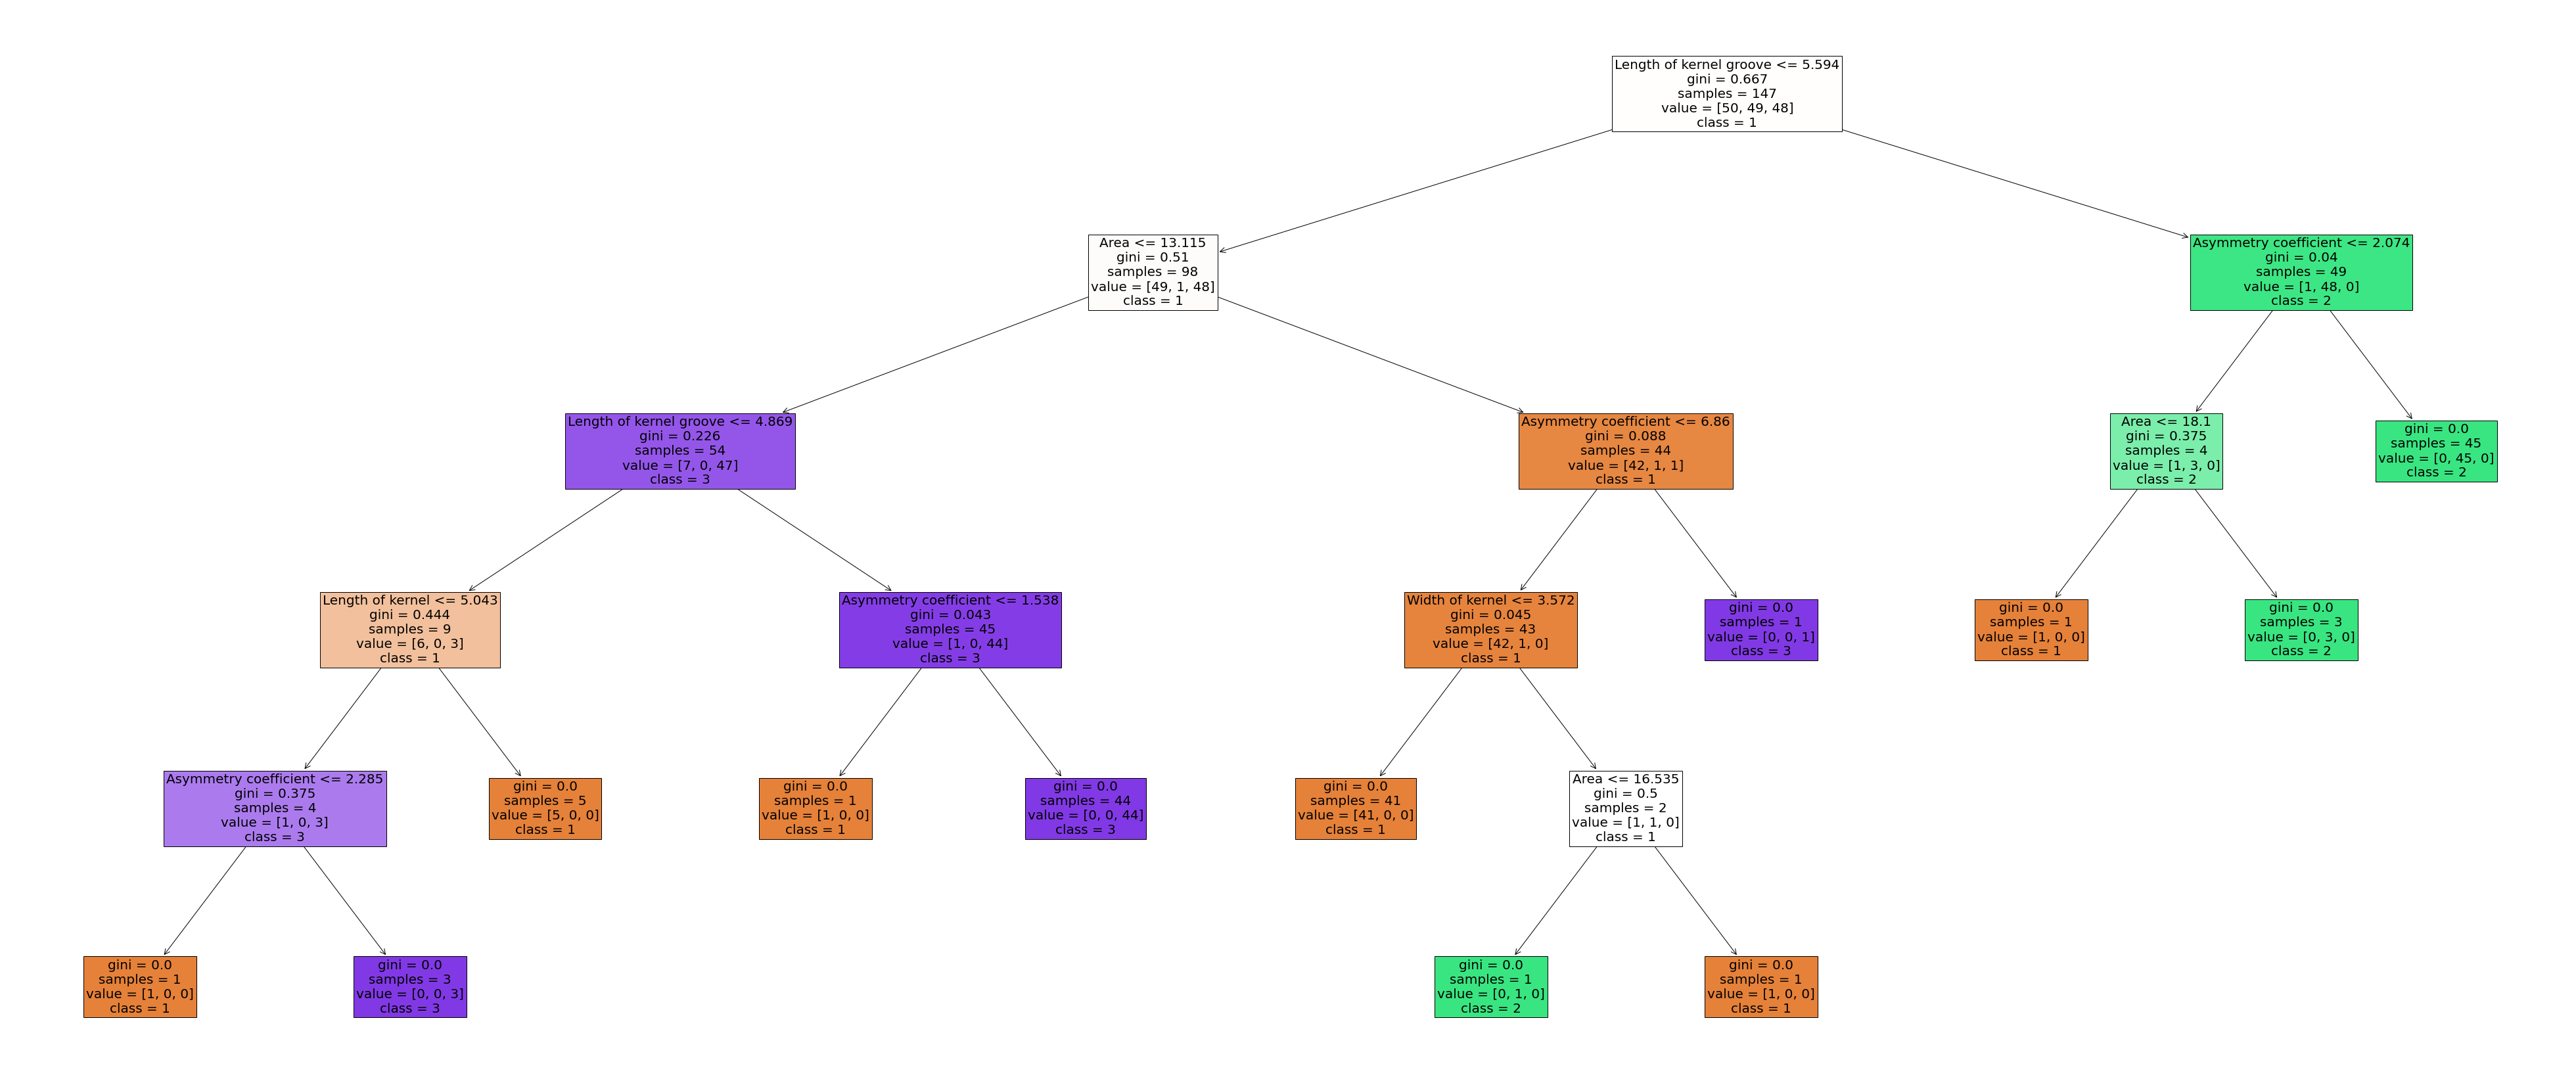

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(70,30))
plot_tree(dc,class_names=[ '1','2','3'],feature_names=X.columns, filled=True,fontsize=20)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
Svc_p = model.predict(X_test)

Svc_p

array([1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1,
       3, 2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2])

SVC
[[17  0  3]
 [ 3 18  0]
 [ 1  0 21]]


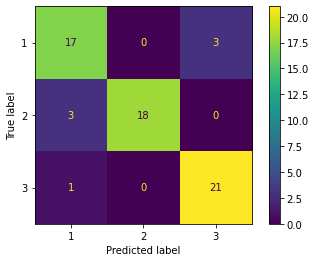

In [ ]:
print("SVC")
print(confusion_matrix(y_test, Svc_p))
cm = confusion_matrix(y_test, Svc_p)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
random_cls = rf.predict(X_test)
random_cls

array([1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1,
       3, 2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 1, 3, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 2])

RANDOM FOREST
[[18  0  2]
 [ 1 20  0]
 [ 5  0 17]]


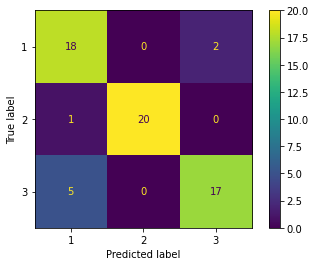

In [ ]:
print("RANDOM FOREST")
print(confusion_matrix(y_test, random_cls))
cm = confusion_matrix(y_test, random_cls)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print("Decision tree")
print(classification_report(y_test, decision_cls))
print("Random forest")
print(classification_report(y_test, random_cls))
print("SVC")
print(classification_report(y_test, Svc_p))

Decision tree
              precision    recall  f1-score   support

           1       0.74      0.85      0.79        20
           2       1.00      0.90      0.95        21
           3       0.86      0.82      0.84        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63

Random forest
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

SVC
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.86      0.92        21
           3       0.88      0.95      0.91

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1,
       3, 2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 2])

LOGISTIC
[[17  0  3]
 [ 1 20  0]
 [ 1  0 21]]


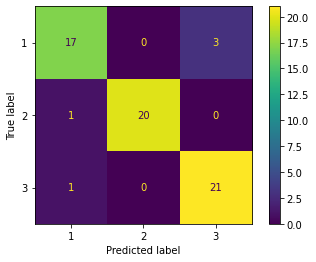

In [ ]:
print("LOGISTIC")
print(confusion_matrix(y_test, pred))
cm = confusion_matrix(y_test, pred)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(" LOGISTIC ACCURACY:",accuracy_score(y_test,pred))
print("DECISION TREE ACCURACY:",accuracy_score(y_test,decision_cls))
print("RANDOM FOREST ACCURACY:",accuracy_score(y_test,random_cls))
print(" SVC ACCURACY:",accuracy_score(y_test,Svc_p))

 LOGISTIC ACCURACY: 0.9206349206349206
DECISION TREE ACCURACY: 0.8571428571428571
RANDOM FOREST ACCURACY: 0.9047619047619048
 SVC ACCURACY: 0.8888888888888888
